In [12]:
from yo_fluq_ds import *
from tg.common.delivery.sagemaker import download_and_open_sagemaker_result, S3TrainingLogsLoader, TrainingLogsViewer
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from tg.common.ml import batched_training as bt
from tg.common.ml.miscellaneous import roc_optimal_threshold

tlw = TrainingLogsViewer

In [13]:
df = pd.read_parquet('files/results_overview.parquet')
df

,metric,ordinal,value,timestamp,job_id
0,roc_auc_score_test,0,0.984579,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
1,roc_auc_score_display,0,0.987968,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
2,loss,0,0.045863,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
3,iteration,0,0.000000,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
4,roc_auc_score_test,1,0.984847,2023-01-27 11:54:44.282659,att-hs100-lr001-2023-01-27-11-42-37-234
...,...,...,...,...,...
395,iteration,98,98.000000,2023-01-27 15:14:32.993998,att-hs10-lr005-2023-01-27-11-39-50-862
396,roc_auc_score_test,99,0.976433,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862
397,roc_auc_score_display,99,0.978493,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862
398,loss,99,0.048486,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862


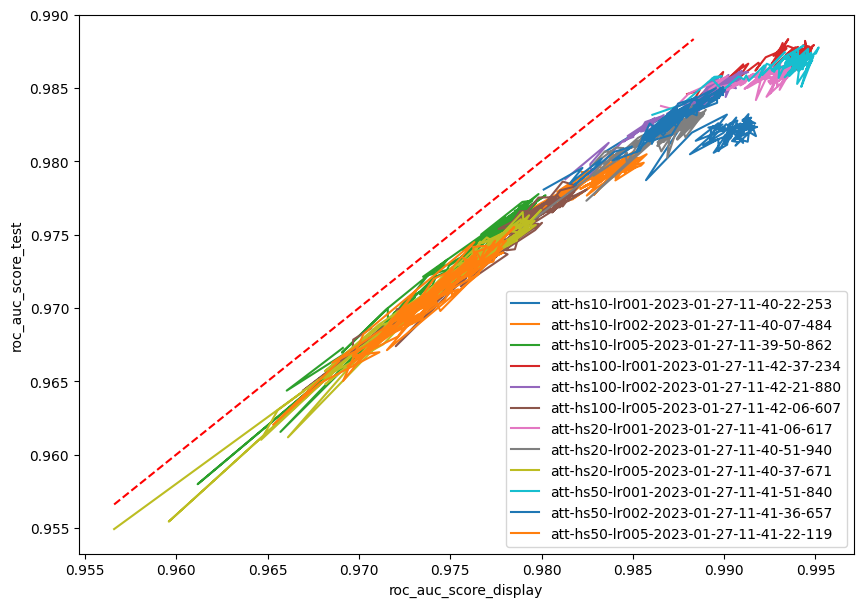

In [37]:
tlw.draw_overfit(df, 'roc_auc_score_display', 'roc_auc_score_test')

<AxesSubplot: >

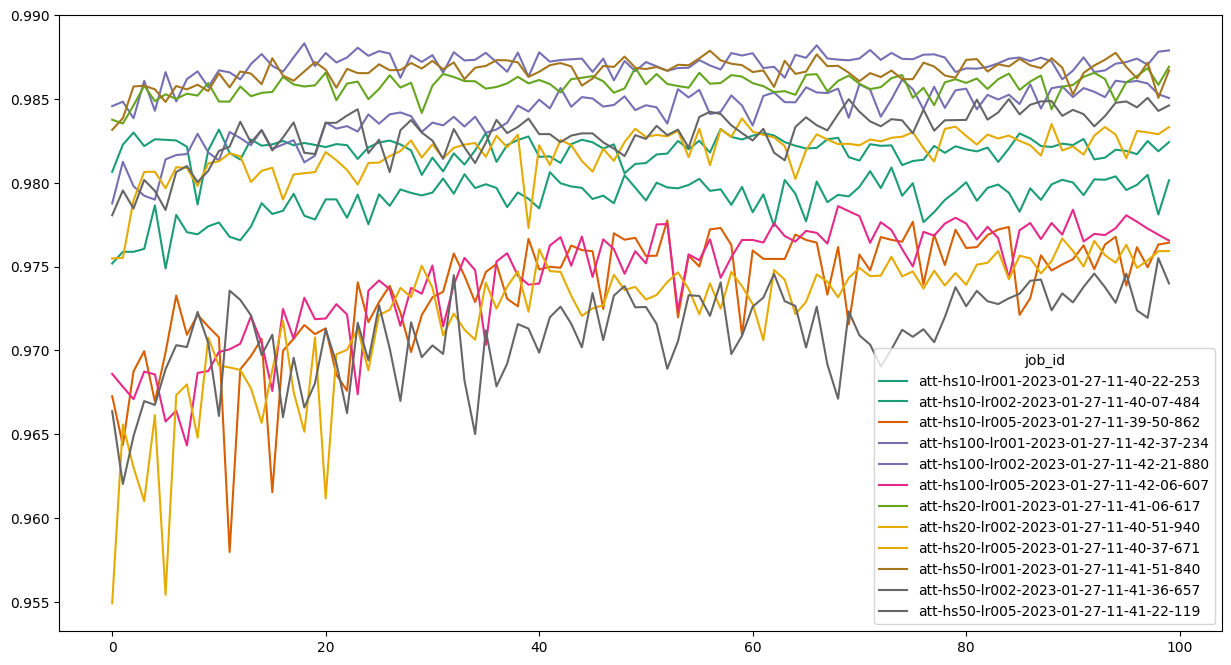

In [21]:
_, ax = plt.subplots(1,1,figsize=(15,8))
tlw.get_metric_by_job(df, 'roc_auc_score_test').plot(ax=ax, cmap='Dark2')

(0.95, 1.0)

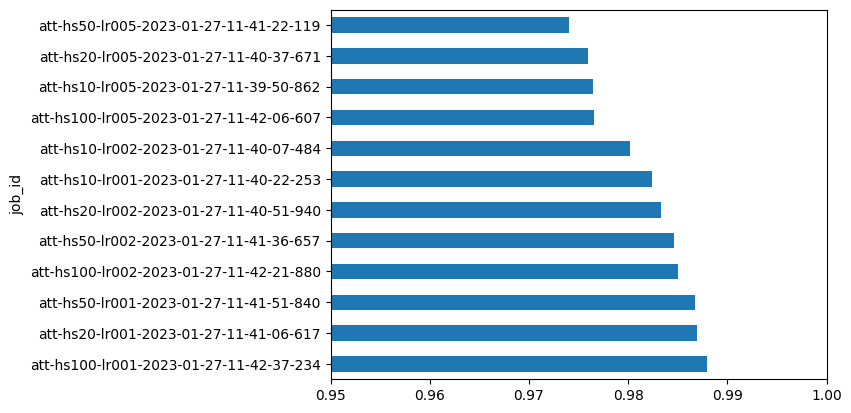

In [32]:
ax = tlw.get_last_values(df).roc_auc_score_test.sort_values(ascending=False).plot(kind='barh')
ax.set_xlim(0.95,1)

In [42]:
loader = download_and_open_sagemaker_result('ps-data-science-sandbox','alt','att-hs100-lr001-2023-01-27-11-42-37-234', True)
rdf = pd.read_parquet(loader.get_path('output/result_df.parquet'))
rdf.to_parquet('files/result_result.parquet')

In [41]:
rdf = rdf.loc[rdf.stage]

,word_id,sentence_id,label,split,true,predicted,stage
sample_id,,,,,,,
12,12,0,0,test,0,0.931204,test
45,45,33,1,test,1,0.082054,test
147,147,143,1,test,1,0.998788,test
231,231,220,1,test,1,0.994174,test
299,299,297,0,test,0,0.000742,test
...,...,...,...,...,...,...,...
3797945,3797945,3797842,1,display,1,0.999914,display
3798085,3798085,3797847,1,display,1,0.997094,display
3798105,3798105,3797848,1,display,1,0.999658,display
